In [12]:
# convulational neural network
import tensorflow as tf
from tensorflow.keras import layers, datasets, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

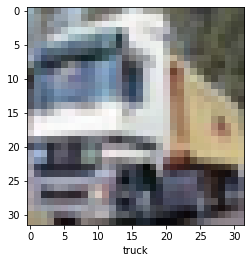

In [4]:
IMG_IND = 1

plt.imshow(train_images[IMG_IND], cmap="gray")
plt.xlabel(class_names[train_labels[IMG_IND][0]])
plt.show()

In [5]:
# A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few denesly connected layers. To idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.

# We will start by building the Convolutional Base.

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

# Layer 1

# The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. We will also apply the activation function relu to the output of each convolution operation.

# Layer 2

# This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

# Other Layers

# The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth.

In [6]:
model.summary() # This will print a summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 73s 45ms/step - loss: 1.5414 - accuracy: 0.4370 - val_loss: 1.3685 - val_accuracy: 0.4988
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1828 - accuracy: 0.5814 - val_loss: 1.1124 - val_accuracy: 0.6023
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0286 - accuracy: 0.6411 - val_loss: 1.0486 - val_accuracy: 0.6384
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9280 - accuracy: 0.6719 - val_loss: 1.0078 - val_accuracy: 0.6513
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8528 - accuracy: 0.7007 - val_loss: 0.8820 - val_accuracy: 0.6992
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7980 - accuracy: 0.7220 - val_loss: 0.8984 - val_accuracy: 0.6932
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7484 - accuracy: 0.7400 - val_loss: 0.8864 -

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.9106 - accuracy: 0.7011 - 3s/epoch - 9ms/step
0.7010999917984009


In [11]:
predictions = model.predict(test_images)

313/313 [==============================] - 4s 11ms/step


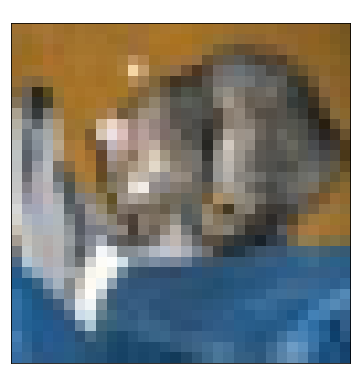

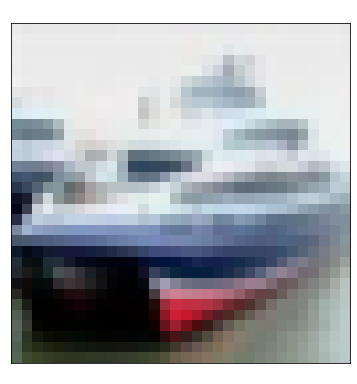

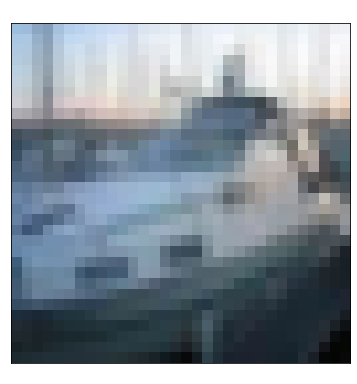

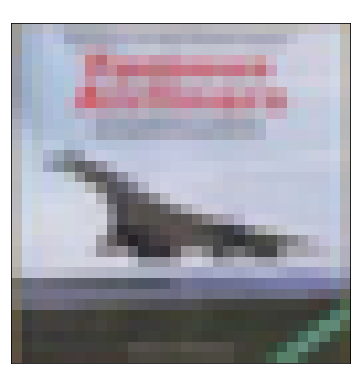

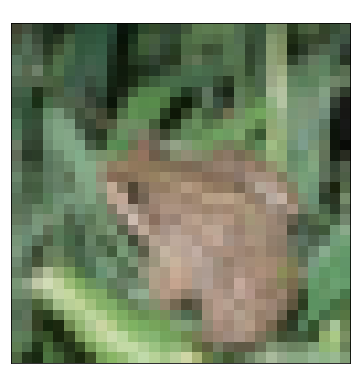

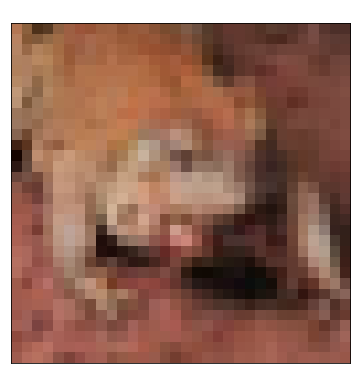

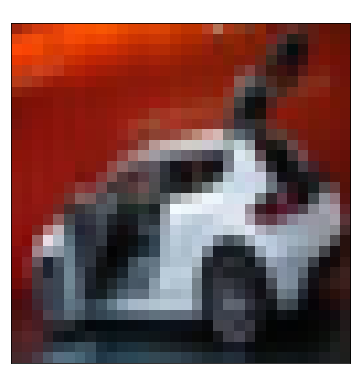

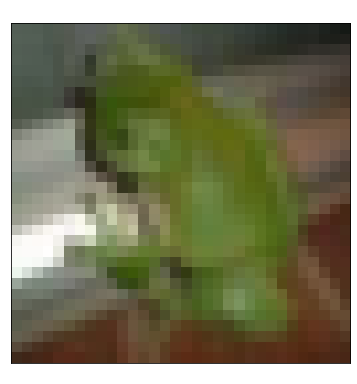

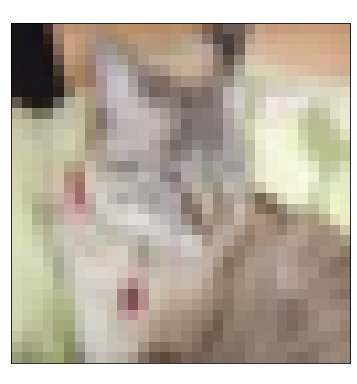

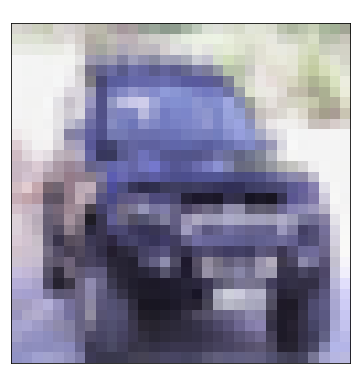

In [48]:
# x = 2
# print("Prediction: {}, Actual: {}".format(class_names[np.argmax(predictions[x])], class_names[test_labels[x][0]]))
# # print(class_names[np.argmax(predictions[x])])
# # print(test_labels[x])
# plt.figure()
# plt.imshow(test_images[x])
# plt.colorbar()
# plt.grid(False)
# plt.show()
for i in range(10):
    plt.figure(figsize=(28, 28))
    plt.subplot(3, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(class_names[test_labels[i][0]])
    plt.xlabel(class_names[np.argmax(predictions[i])])

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/conv2d/Relu' defined at (most recent call last):
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 400, in dispatch_shell
      await result
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\rocka\AppData\Local\Temp\ipykernel_4788\1273953079.py", line 32, in <cell line: 32>
      predict(model, image, label)
    File "C:\Users\rocka\AppData\Local\Temp\ipykernel_4788\1273953079.py", line 6, in predict
      prediction = model.predict(image)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
      return self(x, training=False)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\layers\convolutional\base_conv.py", line 278, in call
      return self.activation(outputs)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\activations.py", line 311, in relu
      return backend.relu(x, alpha=alpha, max_value=max_value, threshold=threshold)
    File "c:\Users\rocka\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py", line 4992, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d/Relu'
input must be 4-dimensional[32,32,3]
	 [[{{node sequential/conv2d/Relu}}]] [Op:__inference_predict_function_80262]